In [1]:
import pandas as pd
import pytz

In [3]:
# Read the data file
weather_data_path = '../data/weather-daylight.csv'
weather_data = pd.read_csv(weather_data_path)

In [4]:
# Calculate total precipitation (p01i) for each day of the week
total_p01i_per_day_et = weather_data.groupby('Day Of Week ET')['p01i'].sum()

# Calculate percentage of OVC and CLR days
percentage_ovc_days_et = (weather_data[weather_data['skyc1'] == 'OVC'].groupby('Day Of Week ET').size() / weather_data.groupby('Day Of Week ET').size()) * 100
percentage_clr_days_et = (weather_data[weather_data['skyc1'] == 'CLR'].groupby('Day Of Week ET').size() / weather_data.groupby('Day Of Week ET').size()) * 100

# Calculate total number of rows (observations) for each day of the week
total_rows_per_day_et = weather_data.groupby('Day Of Week ET').size()

# Combine all the data into one DataFrame
combined_et_df = pd.DataFrame({
    'Day Of Week ET': total_rows_per_day_et.index,
    'Total Number of Rows ET': total_rows_per_day_et.values,
    'Total p01i ET': total_p01i_per_day_et.values,
    'Percentage of OVC Days ET': percentage_ovc_days_et.values,
    'Percentage of CLR Days ET': percentage_clr_days_et.values
})

# Print the final table
print(combined_et_df)

   Day Of Week ET  Total Number of Rows ET  Total p01i ET  \
0               0                      852           0.30   
1               1                      848           5.15   
2               2                      850           0.67   
3               3                      841           0.41   
4               4                      883           0.58   
5               5                      886           7.28   
6               6                      857           0.16   

   Percentage of OVC Days ET  Percentage of CLR Days ET  
0                  20.539906                  45.187793  
1                  28.655660                  42.688679  
2                  28.235294                  50.705882  
3                  14.863258                  61.355529  
4                  15.175538                  55.379388  
5                  26.523702                  38.487585  
6                  25.437573                  38.389732  


In [5]:
weather_data.groupby('Day Of Week ET')['p01i'].sum()

Day Of Week ET
0    0.30
1    5.15
2    0.67
3    0.41
4    0.58
5    7.28
6    0.16
Name: p01i, dtype: float64

In [6]:
!pip install astral


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
from astral.sun import sun
from astral import LocationInfo
from datetime import date

# Specify the location (Washington, DC in this example)
city = LocationInfo("Washington", "USA", "US/Eastern", 38.9072, -77.0369)

# Choose a date
s = sun(city.observer, date=date(2023, 9, 1))

In [ ]:
s

In [ ]:
t=weather_data['valid'][1000]

In [ ]:

# Define a function to calculate sunrise for a single row
def calculate_sunrise(row):
    # Extract the date from the 'valid' column (assuming it's already in datetime format)
    valid_date = row['valid'].date()
    # Calculate sunrise using the astral library
    s = sun(city.observer, date=valid_date)
    return s['sunrise']

def calculate_sunset(row):
    # Extract the date from the 'valid' column (assuming it's already in datetime format)
    valid_date = row['valid'].date()
    # Calculate sunrise using the astral library
    s = sun(city.observer, date=valid_date)
    return s['sunset']

def calculate_daylight(row):
    valid_date = row['valid'].date()
    s = sun(city.observer, date = valid_date)
    return s['sunset']>row['valid']>s['sunrise']

# Apply the function to each row of the DataFrame
# Note: If 'valid' is not in the datetime format, you'll need to convert it first
weather_data['sunrise'] = weather_data.apply(calculate_sunrise, axis=1)
weather_data['sunset'] = weather_data.apply(calculate_sunset, axis=1)
weather_data['daylight'] = weather_data.apply(calculate_daylight, axis=1)

In [ ]:
weather_data['daylight']

In [ ]:
new_data = weather_data[weather_data['daylight']]

In [ ]:
new_data

In [ ]:
new_data.to_csv('weather-daylight.csv')

In [ ]:
# Recalculate the necessary components based on the 'Day Of Week ET' column from the new dataset with daylight information

# Total precipitation (p01i) for each day of the week
total_p01i_per_day_et_new = new_data.groupby('Day Of Week ET')['p01i'].sum()

# Percentage of OVC and CLR days
percentage_ovc_days_et_new = (new_data[(new_data['skyc1'] == 'OVC') | (new_data['skyc2'] == 'OVC') | (new_data['skyc3'] == 'OVC')].groupby('Day Of Week ET').size() / new_data.groupby('Day Of Week ET').size()) * 100
percentage_clr_days_et_new = (new_data[new_data['skyc1'] == 'CLR'].groupby('Day Of Week ET').size() / new_data.groupby('Day Of Week ET').size()) * 100

# Total number of rows (observations) for each day of the week
total_rows_per_day_et_new = new_data.groupby('Day Of Week ET').size()

# Combine all the data into one DataFrame
combined_et_df_new = pd.DataFrame({
    'Day Of Week ET': total_rows_per_day_et_new.index,
    'Total Number of Rows ET': total_rows_per_day_et_new.values,
    'Total p01i ET': total_p01i_per_day_et_new.values,
    'Percentage of OVC Days ET': percentage_ovc_days_et_new.values,
    'Percentage of CLR Days ET': percentage_clr_days_et_new.values
})

combined_et_df_new


# Cloudy Days in Leesburg

Analyze Weather data

In [8]:
df = pd.read_csv('../data/weather-daylight.csv')

In [9]:
df

,id1,id2,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,...,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,valid_ET,Day Of Week ET,sunrise,sunset,daylight
0,0,32,JYO,2023-09-01 10:55:00+00:00,59.0,50.0,72.01,20.0,5.0,0.00,...,NaN,NaN,59.00,KJYO 011055Z AUTO 02005KT 10SM CLR 15/10 A3026...,NaN,2023-09-01 06:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
1,1,33,JYO,2023-09-01 11:15:00+00:00,59.0,50.0,72.01,20.0,6.0,0.00,...,NaN,NaN,59.00,KJYO 011115Z AUTO 02006KT 10SM CLR 15/10 A3027...,NaN,2023-09-01 07:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
2,2,34,JYO,2023-09-01 11:35:00+00:00,59.0,50.0,72.01,20.0,6.0,0.00,...,NaN,NaN,59.00,KJYO 011135Z AUTO 02006KT 10SM CLR 15/10 A3028...,NaN,2023-09-01 07:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
3,3,35,JYO,2023-09-01 11:55:00+00:00,60.8,51.8,72.20,30.0,7.0,0.00,...,NaN,NaN,60.80,KJYO 011155Z AUTO 03007KT 10SM CLR 16/11 A3029...,NaN,2023-09-01 07:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
4,4,36,JYO,2023-09-01 12:15:00+00:00,62.6,51.8,67.75,30.0,8.0,0.00,...,NaN,NaN,62.60,KJYO 011215Z AUTO 03008KT 10SM CLR 17/11 A3029...,NaN,2023-09-01 08:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,6012,13576,JYO,2024-03-09 21:35:00+00:00,44.6,44.6,100.00,350.0,9.0,0.03,...,NaN,NaN,39.18,KJYO 092135Z AUTO 35009KT 1 3/4SM -RA BKN004 O...,NaN,2024-03-09 16:35:00-05:00,5,2024-03-09 11:28:03.012997+00:00,2024-03-09 23:09:29.702861+00:00,True
6013,6013,13577,JYO,2024-03-09 21:55:00+00:00,44.6,44.6,100.00,10.0,7.0,0.05,...,NaN,NaN,40.14,KJYO 092155Z AUTO 01007KT 1 3/4SM -RA OVC004 0...,NaN,2024-03-09 16:55:00-05:00,5,2024-03-09 11:28:03.012997+00:00,2024-03-09 23:09:29.702861+00:00,True
6014,6014,13578,JYO,2024-03-09 22:15:00+00:00,44.6,44.6,100.00,360.0,8.0,0.02,...,NaN,NaN,39.63,KJYO 092215Z AUTO 36008KT 1 1/2SM -VCTSRA OVC0...,NaN,2024-03-09 17:15:00-05:00,5,2024-03-09 11:28:03.012997+00:00,2024-03-09 23:09:29.702861+00:00,True
6015,6015,13579,JYO,2024-03-09 22:35:00+00:00,44.6,44.6,100.00,340.0,11.0,0.13,...,NaN,NaN,38.39,KJYO 092235Z AUTO 34011KT 2 1/2SM +TSRA BKN004...,NaN,2024-03-09 17:35:00-05:00,5,2024-03-09 11:28:03.012997+00:00,2024-03-09 23:09:29.702861+00:00,True


In [15]:
df.describe()

,id1,id2,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,snowdepth,Day Of Week ET
count,6017.000000,6017.000000,5705.000000,5705.000000,5705.000000,6008.000000,6008.000000,6017.000000,6011.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5703.000000,0.0,6017.000000
mean,3008.000000,6612.157554,53.963786,42.250692,67.665832,165.269640,5.953395,0.002418,30.082078,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.289523,NaN,3.020608
std,1737.102616,4065.241617,15.380499,14.652600,20.595358,137.476461,4.963944,0.024501,0.235834,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.685820,NaN,1.999312
min,0.000000,32.000000,12.200000,5.000000,22.810000,0.000000,0.000000,0.000000,29.320000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.880000,NaN,0.000000
25%,1504.000000,2943.000000,42.800000,32.000000,51.610000,10.000000,3.000000,0.000000,29.920000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.940000,NaN,1.000000
50%,3008.000000,6432.000000,51.800000,41.000000,64.230000,180.000000,5.000000,0.000000,30.080000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.800000,NaN,3.000000
75%,4512.000000,10234.000000,64.400000,53.600000,86.490000,310.000000,9.000000,0.000000,30.230000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.400000,NaN,5.000000
max,6016.000000,13580.000000,96.800000,73.400000,100.000000,360.000000,28.000000,0.950000,30.760000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.010000,NaN,6.000000


In [16]:
df.shape

(6017, 37)

In [19]:
df[df['snowdepth'].isna()].shape

(6017, 37)

In [20]:
df['skyc1'].value_counts()

skyc1
CLR    2853
OVC    1370
SCT    1128
BKN     656
VV        2
Name: count, dtype: int64

In [46]:
df.loc[30:50]

,id1,id2,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,...,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,valid_ET,Day Of Week ET,sunrise,sunset,daylight
30,30,62,JYO,2023-09-01 20:55:00+00:00,80.6,51.8,36.79,0.0,0.0,0.0,...,NaN,NaN,80.08,KJYO 012055Z AUTO 00000KT 10SM CLR 27/11 A3025...,NaN,2023-09-01 16:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
31,31,63,JYO,2023-09-01 21:15:00+00:00,80.6,50.0,34.41,140.0,6.0,0.0,...,NaN,NaN,79.88,KJYO 012115Z AUTO 14006KT 10SM CLR 27/10 A3024...,NaN,2023-09-01 17:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
32,32,64,JYO,2023-09-01 21:35:00+00:00,80.6,51.8,36.79,120.0,5.0,0.0,...,NaN,NaN,80.08,KJYO 012135Z AUTO 12005KT 10SM CLR 27/11 A3024...,NaN,2023-09-01 17:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
33,33,65,JYO,2023-09-01 21:55:00+00:00,80.6,50.0,34.41,70.0,4.0,0.0,...,NaN,NaN,79.88,KJYO 012155Z AUTO 07004KT 10SM CLR 27/10 A3024...,NaN,2023-09-01 17:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
34,34,66,JYO,2023-09-01 22:15:00+00:00,78.8,51.8,39.02,150.0,5.0,0.0,...,NaN,NaN,78.80,KJYO 012215Z AUTO 15005KT 10SM CLR 26/11 A3024...,NaN,2023-09-01 18:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
35,35,67,JYO,2023-09-01 22:35:00+00:00,78.8,50.0,36.51,130.0,3.0,0.0,...,NaN,NaN,78.80,KJYO 012235Z AUTO 13003KT 10SM CLR 26/10 A3024...,NaN,2023-09-01 18:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
36,36,68,JYO,2023-09-01 22:55:00+00:00,78.8,51.8,39.02,100.0,3.0,0.0,...,NaN,NaN,78.80,KJYO 012255Z AUTO 10003KT 10SM CLR 26/11 A3024...,NaN,2023-09-01 18:55:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
37,37,69,JYO,2023-09-01 23:15:00+00:00,78.8,51.8,39.02,120.0,5.0,0.0,...,NaN,NaN,78.80,KJYO 012315Z AUTO 12005KT 10SM CLR 26/11 A3023...,NaN,2023-09-01 19:15:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
38,38,70,JYO,2023-09-01 23:35:00+00:00,77.0,51.8,41.42,100.0,3.0,0.0,...,NaN,NaN,77.00,KJYO 012335Z AUTO 10003KT 10SM CLR 25/11 A3024...,NaN,2023-09-01 19:35:00-04:00,4,2023-09-01 10:37:07.576681+00:00,2023-09-01 23:38:34.757806+00:00,True
39,39,104,JYO,2023-09-02 10:55:00+00:00,55.4,53.6,93.65,0.0,0.0,0.0,...,NaN,NaN,55.40,KJYO 021055Z AUTO 00000KT 10SM CLR 13/12 A3026...,NaN,2023-09-02 06:55:00-04:00,5,2023-09-02 10:38:01.238896+00:00,2023-09-02 23:37:02.770575+00:00,True


In [40]:
df[(df['skyc1']=='CLR')].shape

(2853, 37)

In [42]:
df[(df['skyc1']=='CLR') & (df['p01i']>0)].shape

(16, 37)

In [45]:
df[df['p01i']>0].shape[0] / df[df['p01i']>=0].shape[0]

0.038557420641515704

In [49]:
for c in ['skyc1', 'skyc2', 'skyc3', 'skyc4']:
	print(c,df[df[c].isna()].shape)

skyc1 (8, 37)
skyc2 (5017, 37)
skyc3 (5692, 37)
skyc4 (6017, 37)


In [52]:
df[(df['skyc1'] != df['skyc2']) & (df['skyc1']=='CLR')][['skyc1','skyc2']]

,skyc1,skyc2
0,CLR,NaN
1,CLR,NaN
2,CLR,NaN
3,CLR,NaN
4,CLR,NaN
...,...,...
5976,CLR,NaN
5978,CLR,NaN
5979,CLR,NaN
5980,CLR,NaN


In [51]:
df[(df['skyc1'] != df['skyc2'])][['skyc1','skyc2']].value_counts()

skyc1  skyc2
BKN    OVC      225
SCT    BKN      214
       OVC      207
Name: count, dtype: int64

In [53]:
total_p01i_per_day_et_new = df.groupby('Day Of Week ET')['p01i'].sum()

In [54]:
total_p01i_per_day_et_new

Day Of Week ET
0    0.30
1    5.15
2    0.67
3    0.41
4    0.58
5    7.28
6    0.16
Name: p01i, dtype: float64

We would like to count the number of clear observations per day. We can do this with a `groupby` followed by a `size()` function

In [63]:
df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size()

Day Of Week ET
0    385
1    362
2    431
3    516
4    489
5    341
6    329
dtype: int64

<Axes: xlabel='Day Of Week ET'>

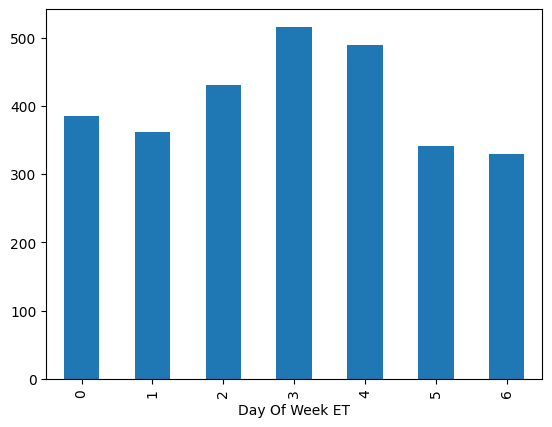

In [73]:
df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size().plot(kind="bar")

Does every day have the same number of recorded observations?

<Axes: xlabel='Day Of Week ET'>

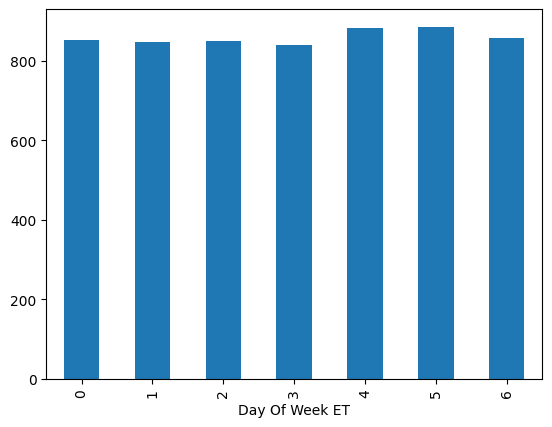

In [74]:
df.groupby('Day Of Week ET').size().plot(kind="bar")

In [75]:
percentage_clr_days_et_new = (df[df['skyc1'] == 'CLR'].groupby('Day Of Week ET').size() / df.groupby('Day Of Week ET').size()) * 100

In [57]:
percentage_clr_days_et_new

Day Of Week ET
0    45.187793
1    42.688679
2    50.705882
3    61.355529
4    55.379388
5    38.487585
6    38.389732
dtype: float64

<Axes: xlabel='Day Of Week ET'>

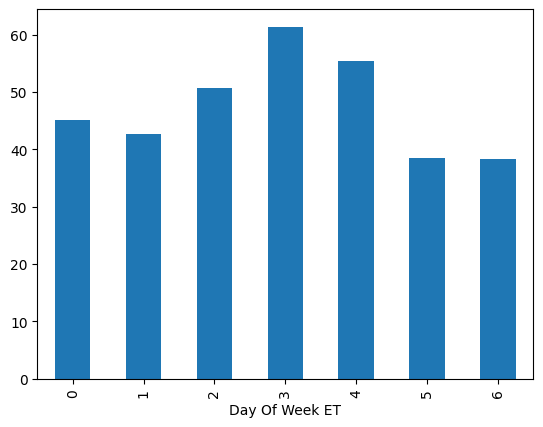

In [76]:
percentage_clr_days_et_new.plot(kind='bar')

Conclusions? BTW what is day 5 and 6? How else could you define a good/bad day? What ways could you change the question to make your desired outcome more likely? Is this statistically significant?